In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import geopandas as gpd
import warnings
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [2]:
Family_2009 = pd.read_csv('/Users/brandendahlem/Downloads/2009_Family.csv')
Family_2013 = pd.read_csv('/Users/brandendahlem/Downloads/Family_2013.csv')
Family_2017 = pd.read_csv('/Users/brandendahlem/Downloads/Family_2017.csv')
Building_Permits = pd.read_csv('/Users/brandendahlem/Downloads/Building_Permits_Issued.csv')
Zip_Codes=pd.read_csv('Coord_Zip.csv')

In [3]:
Family_2009.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2009 LAND':'LandValue', '2009 IMPR':'ImprovementValue', '2009 TOTAL APPR':'AppraisedValue', '2009 TOTAL ASSD':'2009 TOTAL ASSD'},inplace=True)
Family_2009.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0
2,00200001001,GSD,10,1992 SPRINGFIELD HWY,GOODLETTSVILLE,37072,0.0,0.0,0.0,0.0
3,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0
4,00200001200,GSD,10,1855 LAKE RD,RIDGETOP,37152,0.0,0.0,0.0,0.0


In [4]:
Family_2013.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2013 LAND':'LandValue', '2013 IMPR':'ImprovementValue', '2013 TOTAL APPR':'AppraisedValue', '2013 TOTAL ASSD':'2013 TOTAL ASSD'}, inplace=True)
Family_2013.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2013 TOTAL ASSD
0,00400004700,GSD,1,8114 WHITES CREEK PIKE,JOELTON,37080,38800.0,154100.0,192900.0,48225.0
1,00400004800,GSD,1,8120 WHITES CREEK PIKE,JOELTON,37080,41400.0,132600.0,174000.0,43500.0
2,00400004900,GSD,1,8130 WHITES CREEK PIKE,JOELTON,37080,43500.0,82100.0,125600.0,31400.0
3,00400005000,GSD,1,8146 WHITES CREEK PIKE,JOELTON,37080,49100.0,96900.0,146000.0,36500.0
4,00400005100,GSD,1,8150 WHITES CREEK PIKE,JOELTON,37080,38700.0,97900.0,136600.0,34150.0


In [5]:
Family_2017.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2017 LAND':'LandValue', '2017 IMPR':'ImprovementValue', '2017 TOTAL APPR':'AppraisedValue', '2017 TOTAL ASSD':'2017 TOTAL ASSD'}, inplace=True)
Family_2017.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2017 TOTAL ASSD
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,46700,88700,135400,33850
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,40100,109700,149800,37450
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,18000,185100,203100,50775
3,00200001300,RT,10,127 EAST END RD,GOODLETTSVILLE,37072,37300,296000,333300,83325
4,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,30000,34100,64100,16025


In [6]:
Building_Permits.rename(columns={'Permit #':'Permit#','Permit Type Description':'PermitDesc','Permit Subtype Description':'PermitSubDesc', 'Parcel':'Parcel','Date Entered':'DateEntered','Date Issued':'DateIssued','Const. Cost':'ConstCost', 'Address':'Address', 'City':'City','State':'State', 'Zip':'Zip', 'Subdivision/Lot':'SubdivisionLot', 'Contact':'Contact', 'Permit Type':'PermitType', 'Permit Subtype': 'PermitSubtype', 'IVR Trk#': 'IVRTRK#', 'Purpose': 'Purpose', 'Council Dist': 'CouncilDist', 'Census Tract':'CensusTract', 'Mapped Location': 'MappedLoc'})
Building_Permits.head(10)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
0,2018002927,Building Residential - New,Single Family Residence,081160R00100CO,01/18/2018,02/12/2018,206150.0,1017A MONROE ST,NASHVILLE,TN,37208,UNIT A 1017 MONROE,"TRISTAR CONSTRUCTION, INC",CARN,CAA01R301,3439281,to construct 1830SF single family residence wi...,19.0,37019400.0,"1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740..."
1,201617929,Building Use & Occupancy,"Tents, Stages",09215014800,04/19/2016,04/21/2016,2000.0,2300 WEST END AVE,NASHVILLE,TN,37203,N W CORNER WEST END AVE & 23RD AVE N,Music City Tents & Events Llc,CAUO,CAZ06A001,2116751,PERMIT TO ERECT 1:40X85 TENT. THIS TENT IS BEI...,21.0,37016500.0,"2300 WEST END AVE\nNASHVILLE, TN 37203\n(36.14..."
2,2016049270,Building Sign Permit,Sign - Ground / Wall Signs,11909014000,09/14/2016,09/14/2016,15000.0,2802 NOLENSVILLE PIKE,NASHVILLE,TN,37211,PT LOT 2 PATTERSON SUB,BOZMAN SIGN CO INC,CASN,CAZ02A001,3277064,to install replacement signage for existing fr...,16.0,37017300.0,"2802 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."
3,2016029907,Building Residential - Roofing / Siding,Duplex,075150A13900CO,06/20/2016,06/20/2016,17648.0,139 STONERS GLEN DR,HERMITAGE,TN,37076,UNIT 139 STONERS GLEN PHASE 1,"MR ROOF NASHVILLE, LLC",CARK,CAA02R302,3251947,Remove existing shingles and replace with new ...,12.0,37015623.0,"139 STONERS GLEN DR\nHERMITAGE, TN 37076\n(36...."
4,201533533,Building Residential - Tenant Finish Out,"Multifamily, Tri-Plex, Quad, Apartments",10404024100,08/07/2015,11/17/2015,542696.0,70 MUSIC SQ W,NASHVILLE,TN,37203,LOT 1 O.B. HAYES FIRST PLAN CONSOLIDATION OF L...,Construction Enterprises Inc,CART,CAA03R398,2061885,SEE MASTER PERMIT T2015-26520...T.....GRAND AV...,19.0,37016400.0,"70 MUSIC SQ W\nNASHVILLE, TN 37203\n(36.147074..."
5,201605753,Building Residential - Rehab,Single Family Residence,131060E32200CO,02/10/2016,02/10/2016,50000.0,322 BOXMERE PL,NASHVILLE,TN,37215,UNIT 322 BURTON HILLS VILLAGE OF BOXMERE-PHASE 1,Sharp & Robbins Construction Llc,CARR,CAA01R301,2100747,to conduct interior renovation to existing uni...,25.0,37017902.0,"322 BOXMERE PL\nNASHVILLE, TN 37215\n(36.09425..."
6,2017032777,Building Residential - New,Single Family Residence,072103B00300CO,05/17/2017,05/24/2017,226201.0,1037 FAIRWIN AVE,NASHVILLE,TN,37216,UNIT 3 2619 GALLATIN PIKE TOWNHOMES,PARAGON GROUP LLC,CARN,CAA01R301,3367050,to construct 2008Sf single family residence wi...,5.0,37011400.0,"1037 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.198..."
7,201546095,Building Residential - Rehab,Single Family Residence,12809002600,10/22/2015,10/22/2015,30000.0,305 HARPETH VALLEY RD,NASHVILLE,TN,37221,LOT 35 B. V. 1776 ESTATES,"Odyssey Construction, Llc",CARR,CAA01R301,2078541,to make general repairs to existing residence....,22.0,37018301.0,"305 HARPETH VALLEY RD\nNASHVILLE, TN 37221\n(3..."
8,201619676,Building Commercial - Roofing / Siding,"Manufacturing, Light Hazardous (H1-H5)",09314033300,04/28/2016,04/28/2016,66961.0,625 FOGG ST,NASHVILLE,TN,37203,LOTS 30 TH 34 EWING & WETMORE,Ragan Construction Co Inc (Formerly Southern R...,CACK,CAH06H000,2119017,to reroof existing cromatics building.,19.0,37019500.0,"625 FOGG ST\nNASHVILLE, TN 37203\n(36.150909, ..."
9,201550728,Building Commercial - Foundation,"Multifamily, Apt / Twnhome > 5 Unit Bldg",08305009600,11/18/2015,02/01/2016,219566.0,1035 W EASTLAND AVE,NASHVILLE,TN,37206,"LOT 4 EDGEFIELD HOSPITAL, INC. RESUB",Southland Constructors Inc.,CACF,CAA03R399,2084584,"per shell permit 201550039, to conduct foundat...",5.0,37011700.0,"1035 W EASTLAND AVE\nNASHVILLE, TN 37206\n(36...."


In [7]:
Family_2009.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD
count,183414.000000,183414.000000,1.834140e+05,1.834140e+05,1.834140e+05,1.834140e+05
mean,18.083232,37166.304606,6.046092e+04,1.410188e+05,2.014797e+05,5.058643e+04
std,10.312674,73.360963,9.491924e+04,1.536792e+05,2.229372e+05,5.578090e+04
min,1.000000,37013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000,37115.000000,2.500000e+04,8.020000e+04,1.077000e+05,2.710000e+04
50%,18.000000,37208.000000,3.200000e+04,1.094000e+05,1.452000e+05,3.645000e+04
75%,27.000000,37214.000000,5.190000e+04,1.569000e+05,2.199000e+05,5.520000e+04
max,35.000000,37228.000000,4.623800e+06,8.508500e+06,1.037700e+07,2.594250e+06


In [8]:
Family_2013.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2013 TOTAL ASSD
count,186267.000000,186267.000000,1.862670e+05,1.862670e+05,1.862670e+05,1.862670e+05
mean,18.151798,37165.693274,5.835695e+04,1.426891e+05,2.010460e+05,5.054135e+04
std,10.333527,73.776175,9.032982e+04,1.610503e+05,2.280168e+05,5.704308e+04
min,1.000000,37013.000000,8.000000e+02,0.000000e+00,1.400000e+03,3.500000e+02
25%,9.000000,37115.000000,2.200000e+04,7.790000e+04,1.034000e+05,2.602500e+04
50%,18.000000,37208.000000,3.000000e+04,1.087000e+05,1.428000e+05,3.592500e+04
75%,27.000000,37214.000000,5.000000e+04,1.580000e+05,2.212000e+05,5.560000e+04
max,99.000000,37228.000000,3.859800e+06,1.058050e+07,1.163050e+07,2.907625e+06


In [9]:
Family_2017.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2017 TOTAL ASSD
count,197114.000000,197114.000000,1.971140e+05,1.971140e+05,1.971140e+05,1.971140e+05
mean,18.250211,37164.657051,8.482655e+04,1.932881e+05,2.781146e+05,6.993672e+04
std,10.330018,111.948534,1.086797e+05,1.966430e+05,2.743975e+05,6.880160e+04
min,1.000000,0.000000,9.000000e+02,0.000000e+00,2.500000e+03,6.250000e+02
25%,9.000000,37115.000000,3.300000e+04,1.061000e+05,1.497000e+05,3.777500e+04
50%,19.000000,37207.000000,4.900000e+04,1.507000e+05,2.078000e+05,5.232500e+04
75%,27.000000,37214.000000,8.500000e+04,2.221000e+05,3.134000e+05,7.877500e+04
max,35.000000,37221.000000,4.832000e+06,9.911800e+06,1.149580e+07,2.888680e+06


In [10]:
Building_Permits.describe()

,Const. Cost,Zip,IVR Trk#,Council Dist,Census Tract
count,3.608500e+04,36221.000000,3.622100e+04,36141.000000,3.603900e+04
mean,2.899015e+05,37155.037078,3.024253e+06,17.586287,1.372843e+08
std,1.933948e+06,978.455230,5.796553e+05,9.145513,2.130941e+09
min,0.000000e+00,0.000000,1.765800e+04,1.000000,1.020000e+04
25%,7.637000e+03,37203.000000,2.119153e+06,10.000000,3.701320e+07
50%,5.000000e+04,37208.000000,3.313781e+06,19.000000,3.701563e+07
75%,2.144000e+05,37211.000000,3.416495e+06,24.000000,3.701820e+07
max,8.809536e+07,37240.000000,3.556943e+06,35.000000,4.703702e+10


In [11]:
Building_Permits.rename(columns={'Permit #': 'PermitNo', 'Permit Type Description':'PermTypeDesc', 'Permit Subtype Description': 'PermSubtypeDesc', 'Parcel':'Parcel', 'Date Entered':'Entered', 'Date Issued': 'Issued', 'Const. Cost': 'ConstCost', 'Address':'Address', 'City':'City', 'State':'State', 'Zip':'Zip', 'Subdivision/Lot': 'SubdLot', 'Contact':'Contact', 'Permit Type': 'PermType', 'Permit Subtype': 'PermSubtype', 'IVR Trk#': 'IVRTrk#', 'Purpose':'Purpose', 'Council Dist':'CouncilDist', 'Census Tract':'CensusTract', 'Mapped Location':'MappedLoc'},inplace=True)

In [12]:
Building_Permits['MappedLoc'][1]

'2300 WEST END AVE\nNASHVILLE, TN 37203\n(36.148736, -86.804731)'

In [13]:
coords = re.compile(r'\(.*\)')

In [14]:
matches = []

In [15]:
for string in Building_Permits.MappedLoc:
    match=re.findall(coords,string)
    matches.append(match)

In [16]:
matches[1]

matches=pd.DataFrame(matches)

# keep only first column
matches=matches.iloc[:,0]
Building_Permits=Building_Permits.join(matches)
# rename column '0' as 'location'
Building_Permits.rename(columns={0:'Location'},inplace=True)

In [17]:
Building_Permits['CouncilDist'].unique()

array([19., 21., 16., 12., 25.,  5., 22.,  7., 20., 14., 24.,  6.,  2.,
       31., 10., 32., 15., 17., 18., 29.,  9.,  1., 26., 34., 11.,  8.,
       30., 13., 23.,  3., 33., nan, 35.,  4., 28., 27.])

In [18]:
CensusTract1=Building_Permits.groupby('CensusTract').count()

In [19]:
Building_Permits['PermType'].unique()

array(['CARN', 'CAUO', 'CASN', 'CARK', 'CART', 'CARR', 'CACK', 'CACF',
       'CACR', 'CACN', 'CACA', 'CADM', 'CACT', 'CARA', 'CARH', 'CARJ',
       'CATR', 'CACH', 'CABL', 'CARF', 'CARE', 'CARP', 'CACG', 'CACJ',
       'CARW', 'CAMV', 'CACP', 'CARL', 'CACE', 'CACL'], dtype=object)

In [20]:
Building_Permits.PermTypeDesc.unique()

array(['Building Residential - New', 'Building Use & Occupancy',
       'Building Sign Permit', 'Building Residential - Roofing / Siding',
       'Building Residential - Tenant Finish Out',
       'Building Residential - Rehab',
       'Building Commercial - Roofing / Siding',
       'Building Commercial - Foundation', 'Building Commercial - Rehab',
       'Building Commercial - New', 'Building Commercial - Addition',
       'Building Demolition Permit',
       'Building Commercial - Tenant Finish Out',
       'Building Residential - Addition', 'Building Residential - Shell',
       'Building Residential - Fire Damage',
       'Building Tree Removal Permit', 'Building Commercial - Shell',
       'Building Blasting Permit', 'Building Residential - Foundation',
       'Building Residential - Amend Permit',
       'Building Residential - Change Contractor',
       'Building Commercial - Structural Frame',
       'Building Commercial - Fire Damage',
       'Building Residential - Renew Per

### Moving columns within a dataframe. Remove the columns from the dataframe, add them back in ---v

In [21]:
cols = list(Building_Permits.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('PermType')) #Remove b from list
cols.pop(cols.index('PermTypeDesc')) #Remove x from list
Building_Permits= Building_Permits[['PermType','PermTypeDesc']+cols]

In [22]:
Building_Permits.drop(columns='Entered',inplace=True)

In [23]:
CARN_df=pd.DataFrame(Building_Permits.loc[Building_Permits['PermType']=='CARN'])
CARN_df;

Permits_new_df=pd.DataFrame(Building_Permits.loc[Building_Permits['PermType'].isin(['CARN','CARR','CADM'])])
Permits_new_df.head(10)

,PermType,PermTypeDesc,PermitNo,PermSubtypeDesc,Parcel,Issued,ConstCost,Address,City,State,Zip,SubdLot,Contact,PermSubtype,IVRTrk#,Purpose,CouncilDist,CensusTract,MappedLoc,Location
0,CARN,Building Residential - New,2018002927,Single Family Residence,081160R00100CO,02/12/2018,206150.0,1017A MONROE ST,NASHVILLE,TN,37208,UNIT A 1017 MONROE,"TRISTAR CONSTRUCTION, INC",CAA01R301,3439281,to construct 1830SF single family residence wi...,19.0,37019400.0,"1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740...","(36.174077, -86.797183)"
5,CARR,Building Residential - Rehab,201605753,Single Family Residence,131060E32200CO,02/10/2016,50000.0,322 BOXMERE PL,NASHVILLE,TN,37215,UNIT 322 BURTON HILLS VILLAGE OF BOXMERE-PHASE 1,Sharp & Robbins Construction Llc,CAA01R301,2100747,to conduct interior renovation to existing uni...,25.0,37017902.0,"322 BOXMERE PL\nNASHVILLE, TN 37215\n(36.09425...","(36.09425, -86.818068)"
6,CARN,Building Residential - New,2017032777,Single Family Residence,072103B00300CO,05/24/2017,226201.0,1037 FAIRWIN AVE,NASHVILLE,TN,37216,UNIT 3 2619 GALLATIN PIKE TOWNHOMES,PARAGON GROUP LLC,CAA01R301,3367050,to construct 2008Sf single family residence wi...,5.0,37011400.0,"1037 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.198...","(36.198241, -86.742235)"
7,CARR,Building Residential - Rehab,201546095,Single Family Residence,12809002600,10/22/2015,30000.0,305 HARPETH VALLEY RD,NASHVILLE,TN,37221,LOT 35 B. V. 1776 ESTATES,"Odyssey Construction, Llc",CAA01R301,2078541,to make general repairs to existing residence....,22.0,37018301.0,"305 HARPETH VALLEY RD\nNASHVILLE, TN 37221\n(3...","(36.087682, -86.95111)"
11,CARN,Building Residential - New,201605693,"Accessory Structure, Carport",09106037500,02/10/2016,7833.0,5410A KENTUCKY AVE,NASHVILLE,TN,37209,LOT 1315 BLK 184 WEST NASH 1,Gianikas Contractors Inc,CAA14U004,2100683,DETACHED STRUTURE RESTRICTED COVEVANT APP 2016...,20.0,37013300.0,"5410A KENTUCKY AVE\nNASHVILLE, TN 37209\n(36.1...","(36.159684, -86.853852)"
14,CARN,Building Residential - New,2017061156,"Accessory Structure, Garage",09213005200,10/23/2017,15000.0,3724 PARK AVE,NASHVILLE,TN,37209,LOT 12 BLOCK 8 CHARLOTTE PK 2ND ADDN,"PIRTLE, JOHN DBA THIRD COAST BUILDERS",CAA14U009,3407326,RECEIVED RESTRICTIVE COVENANT FOR DETACHED STR...,24.0,37013500.0,"3724 PARK AVE\nNASHVILLE, TN 37209\n(36.151554...","(36.151554, -86.830222)"
16,CARN,Building Residential - New,2016069036,Single Family Residence,070070C00100CO,12/28/2016,235213.0,1012A ALICE ST,NASHVILLE,TN,37218,UNIT 1012A 1012 ALICE AVENUE,CROWN INDUSTRIES LLC,CAA01R301,3301562,To construct Unit A of 1012 Alice Ave of new ...,2.0,37012801.0,"1012A ALICE ST\nNASHVILLE, TN 37218\n(36.20332...","(36.203329, -86.810824)"
17,CARN,Building Residential - New,2017074521,"Accessory Structure, Shed / Storage Bldg",17301025800,11/20/2017,13389.0,732 RIDGEVIEW CT,ANTIOCH,TN,37013,L 9-B DREAMLAND ESTATES SOUTHEAST SEC 3 ZLD RESUB,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAA14U011,3425318,to construct a 15 x 20 detached storage buildi...,31.0,37019112.0,"732 RIDGEVIEW CT\nANTIOCH, TN 37013\n(36.03423...","(36.034239, -86.708892)"
18,CARN,Building Residential - New,201614829,Single Family Residence,01200025600,06/27/2016,456678.0,2121 BAKER RD,GOODLETTSVILLE,TN,37072,N/S BAKER RD W OF OLD DICKERSON PK,"Pettis Builders, Llc",CAA01R301,2112744,CONSTRUCT A SINGLE FAMILY HOME ON THE PROPERTY...,10.0,37010202.0,"2121 BAKER RD\nGOODLETTSVILLE, TN 37072\n(36.3...","(36.364891, -86.755355)"
19,CARR,Building Residential - Rehab,2017035041,Single Family Residence,103160B02200CO,05/30/2017,40000.0,4215 HARDING PIKE 211,NASHVILLE,TN,37205,APT. 211 WINDSOR TOWER COND.,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAA01R301,3370215,RENOVATIONS TO SINGLE FAMILY RES...WHICH IS PA...,24.0,37018000.0,"4215 HARDING PIKE 211\nNASHVILLE, TN 37205\n(3...","(36.128659, -86.841815)"


In [24]:
#Building_Permits[['PermType','PermTypeDesc','Address','City','State','Zip']]

In [25]:
print(type(Permits_new_df['Location']))

<class 'pandas.core.series.Series'>


In [26]:
Permits_new_df['Location'].astype('str',inplace=True).head()

0     (36.174077, -86.797183)
5      (36.09425, -86.818068)
6     (36.198241, -86.742235)
7      (36.087682, -86.95111)
11    (36.159684, -86.853852)
Name: Location, dtype: object

In [27]:
coord =pd.DataFrame(Permits_new_df['Location'] \
    .str.replace(')', '') \
    .str.replace('(', '') \
    .str.split(',', expand = True))

coord.rename(columns={0:'Lat', 1:'Long'}, inplace=True)

coord.head()

,Lat,Long
0,36.174077,-86.797183
5,36.09425,-86.818068
6,36.198241,-86.742235
7,36.087682,-86.95111
11,36.159684,-86.853852


In [28]:
Coord_df=coord.join(Permits_new_df,how='right')
#coord.rename(columns={'0':'Latitude', '1':'Longitude'}, inplace=True)
Coord_df.head(10)

,Lat,Long,PermType,PermTypeDesc,PermitNo,PermSubtypeDesc,Parcel,Issued,ConstCost,Address,...,Zip,SubdLot,Contact,PermSubtype,IVRTrk#,Purpose,CouncilDist,CensusTract,MappedLoc,Location
0,36.174077,-86.797183,CARN,Building Residential - New,2018002927,Single Family Residence,081160R00100CO,02/12/2018,206150.0,1017A MONROE ST,...,37208,UNIT A 1017 MONROE,"TRISTAR CONSTRUCTION, INC",CAA01R301,3439281,to construct 1830SF single family residence wi...,19.0,37019400.0,"1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740...","(36.174077, -86.797183)"
5,36.09425,-86.818068,CARR,Building Residential - Rehab,201605753,Single Family Residence,131060E32200CO,02/10/2016,50000.0,322 BOXMERE PL,...,37215,UNIT 322 BURTON HILLS VILLAGE OF BOXMERE-PHASE 1,Sharp & Robbins Construction Llc,CAA01R301,2100747,to conduct interior renovation to existing uni...,25.0,37017902.0,"322 BOXMERE PL\nNASHVILLE, TN 37215\n(36.09425...","(36.09425, -86.818068)"
6,36.198241,-86.742235,CARN,Building Residential - New,2017032777,Single Family Residence,072103B00300CO,05/24/2017,226201.0,1037 FAIRWIN AVE,...,37216,UNIT 3 2619 GALLATIN PIKE TOWNHOMES,PARAGON GROUP LLC,CAA01R301,3367050,to construct 2008Sf single family residence wi...,5.0,37011400.0,"1037 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.198...","(36.198241, -86.742235)"
7,36.087682,-86.95111,CARR,Building Residential - Rehab,201546095,Single Family Residence,12809002600,10/22/2015,30000.0,305 HARPETH VALLEY RD,...,37221,LOT 35 B. V. 1776 ESTATES,"Odyssey Construction, Llc",CAA01R301,2078541,to make general repairs to existing residence....,22.0,37018301.0,"305 HARPETH VALLEY RD\nNASHVILLE, TN 37221\n(3...","(36.087682, -86.95111)"
11,36.159684,-86.853852,CARN,Building Residential - New,201605693,"Accessory Structure, Carport",09106037500,02/10/2016,7833.0,5410A KENTUCKY AVE,...,37209,LOT 1315 BLK 184 WEST NASH 1,Gianikas Contractors Inc,CAA14U004,2100683,DETACHED STRUTURE RESTRICTED COVEVANT APP 2016...,20.0,37013300.0,"5410A KENTUCKY AVE\nNASHVILLE, TN 37209\n(36.1...","(36.159684, -86.853852)"
14,36.151554,-86.830222,CARN,Building Residential - New,2017061156,"Accessory Structure, Garage",09213005200,10/23/2017,15000.0,3724 PARK AVE,...,37209,LOT 12 BLOCK 8 CHARLOTTE PK 2ND ADDN,"PIRTLE, JOHN DBA THIRD COAST BUILDERS",CAA14U009,3407326,RECEIVED RESTRICTIVE COVENANT FOR DETACHED STR...,24.0,37013500.0,"3724 PARK AVE\nNASHVILLE, TN 37209\n(36.151554...","(36.151554, -86.830222)"
16,36.203329,-86.810824,CARN,Building Residential - New,2016069036,Single Family Residence,070070C00100CO,12/28/2016,235213.0,1012A ALICE ST,...,37218,UNIT 1012A 1012 ALICE AVENUE,CROWN INDUSTRIES LLC,CAA01R301,3301562,To construct Unit A of 1012 Alice Ave of new ...,2.0,37012801.0,"1012A ALICE ST\nNASHVILLE, TN 37218\n(36.20332...","(36.203329, -86.810824)"
17,36.034239,-86.708892,CARN,Building Residential - New,2017074521,"Accessory Structure, Shed / Storage Bldg",17301025800,11/20/2017,13389.0,732 RIDGEVIEW CT,...,37013,L 9-B DREAMLAND ESTATES SOUTHEAST SEC 3 ZLD RESUB,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAA14U011,3425318,to construct a 15 x 20 detached storage buildi...,31.0,37019112.0,"732 RIDGEVIEW CT\nANTIOCH, TN 37013\n(36.03423...","(36.034239, -86.708892)"
18,36.364891,-86.755355,CARN,Building Residential - New,201614829,Single Family Residence,01200025600,06/27/2016,456678.0,2121 BAKER RD,...,37072,N/S BAKER RD W OF OLD DICKERSON PK,"Pettis Builders, Llc",CAA01R301,2112744,CONSTRUCT A SINGLE FAMILY HOME ON THE PROPERTY...,10.0,37010202.0,"2121 BAKER RD\nGOODLETTSVILLE, TN 37072\n(36.3...","(36.364891, -86.755355)"
19,36.128659,-86.841815,CARR,Building Residential - Rehab,2017035041,Single Family Residence,103160B02200CO,05/30/2017,40000.0,4215 HARDING PIKE 211,...,37205,APT. 211 WINDSOR TOWER COND.,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAA01R301,3370215,RENOVATIONS TO SINGLE FAMILY RES...WHICH IS PA...,24.0,37018000.0,"4215 HARDING PIKE 211\nNASHVILLE, TN 37205\n(3...","(36.128659, -86.841815)"


In [29]:
stypes = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R398', 'CAA03R399']

homes = pd.DataFrame(Coord_df.loc[Coord_df.PermSubtype.isin(stypes)])

demos = Coord_df.loc[Coord_df.PermType == 'CADM']

rebuilds = pd.DataFrame(homes.loc[homes.Address.isin(demos.Address)])
rebuilds.head()

,Lat,Long,PermType,PermTypeDesc,PermitNo,PermSubtypeDesc,Parcel,Issued,ConstCost,Address,...,Zip,SubdLot,Contact,PermSubtype,IVRTrk#,Purpose,CouncilDist,CensusTract,MappedLoc,Location
26,36.164004,-86.870782,CARN,Building Residential - New,2017054780,Single Family Residence,091010O00100CO,08/24/2017,167736.0,713 PARK ST,...,37209,UNIT A HOMES AT 713 PARK STREET,"MOORE HOMES, LLC",CAA01R301,3398487,PERMIT IS TO CONSTRUCT UNIT A OF PROPOSED HORI...,20.0,37013202.0,"713 PARK ST\nNASHVILLE, TN 37209\n(36.164004, ...","(36.164004, -86.870782)"
53,36.145846,-86.830042,CARN,Building Residential - New,2017076908,Single Family Residence,10401011800,12/06/2017,298635.0,208 CHAMBERLIN ST,...,37209,LOT 31 BLK 26 PLUMMER PLACE,"POTTER, ROGER CONSTRUCTION",CAA01R301,3428408,Permit to construct a single family residence ...,24.0,37013500.0,"208 CHAMBERLIN ST\nNASHVILLE, TN 37209\n(36.14...","(36.145846, -86.830042)"
85,36.190586,-86.747316,CARN,Building Residential - New,2016040448,Single Family Residence,08301007700,08/08/2016,199503.0,1034C W GREENWOOD AVE,...,37206,PT LOT 10 JONES & BRADFORD,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAA01R301,3265615,to construct a single family residence with 17...,5.0,37011700.0,"1034C W GREENWOOD AVE\nNASHVILLE, TN 37206\n(3...","(36.190586, -86.747316)"
145,36.169173,-86.739843,CARN,Building Residential - New,2017019285,Single Family Residence,09402005500,03/22/2017,344822.0,1706 LONG AVE,...,37206,PT LOT 228 EDGEFIELD LAND CO 1,"CHESNUT, MARK ANDREW",CAA01R301,3338381,to construct 3061SF single family residence wi...,6.0,37012200.0,"1706 LONG AVE\nNASHVILLE, TN 37206\n(36.169173...","(36.169173, -86.739843)"
165,36.141863,-86.825935,CARN,Building Residential - New,2018015117,Single Family Residence,104014B00100CO,04/24/2018,186323.0,506 ACKLEN PARK DR,...,37205,UNIT A HOMES AT 506 ACKLEN PARK,THE SECAL GROUP LLC,CAA01R301,3460580,"parent parcel is zoned R6, contains 6800 sf lo...",24.0,37016700.0,"506 ACKLEN PARK DR\nNASHVILLE, TN 37205\n(36.1...","(36.141863, -86.825935)"


In [30]:
rebuilds_choro_map_data=rebuilds[['ConstCost','Zip','PermType','CouncilDist','Address','Issued']]

In [31]:
#rebuilds_choro_map_data
zip_group = rebuilds.groupby('Zip')

Const_cost_mean=pd.DataFrame(zip_group.ConstCost.mean())

Const_cost_mean

,ConstCost
Zip,
37013,195267.285714
37027,365918.600000
37072,30000.000000
37076,142463.666667
37080,600.000000
37115,173008.333333
37138,223588.000000
37143,60580.000000
37203,698766.170732


<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


ConstCost    float64
dtype: object

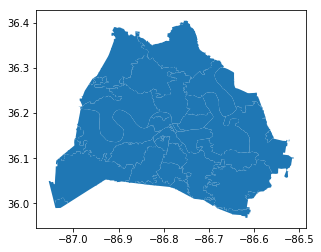

In [32]:
zip_codes = gpd.read_file('/Users/brandendahlem/Downloads/Zip Codes (GIS).geojson')

rebuilds_geo_map = zip_codes

rebuilds_choro_map_data.head()

rebuilds_geo_map.rename(columns={'zip':'Zip'},inplace=True)

rebuilds_geo_map.plot()

rebuilds_geo_map

rebuilds_geo_map['Zip']=pd.to_numeric(rebuilds_geo_map['Zip'])
#print(type(rebuilds_geo_map['Zip']))
print(type(Const_cost_mean))
print(type(rebuilds_geo_map))

Const_cost_mean.dtypes

In [33]:
Const_cost_mean.head()

,ConstCost
Zip,
37013,195267.285714
37027,365918.600000
37072,30000.000000
37076,142463.666667
37080,600.000000


In [34]:
rebuilds_geo_map.head()

,Zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."
1,37027,37,BRENTWOOD,3558.4949049555025,315672.26501464844,"(POLYGON ((-86.719974241412 36.009524281615, -..."
2,37143,29,PEGRAM,7053.537934957626,1901096.087890625,"(POLYGON ((-87.03537311557 36.087623620297, -8..."
3,37143,28,PEGRAM,1197.1070870572601,83126.842468261719,"(POLYGON ((-87.03605109734001 36.095325458066,..."
4,37240,44,NASHVILLE,9240.7969963306841,3146698.6988525391,"(POLYGON ((-86.803254434485 36.149298486807, -..."


In [35]:
rebuilds_geo_map.dtypes

Zip                int64
objectid          object
po_name           object
shape_stlength    object
shape_starea      object
geometry          object
dtype: object

In [36]:
#merged = rebuilds_geo_map.set_index('zip').join(Const_cost_mean,how='outer')
#merged

merged=pd.merge(rebuilds_geo_map,Const_cost_mean,on='Zip',how='right'

)

ConstCost=merged.ConstCost

ConstCost=round(ConstCost)

ConstCost.dropna(inplace=True)

ConstCost.astype(int)

ConstCost=pd.to_numeric(ConstCost)

In [83]:
merged.head()

,Zip,objectid,po_name,shape_stlength,shape_starea,geometry,ConstCost
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -...",365918.6
1,37027,37,BRENTWOOD,3558.4949049555025,315672.26501464844,"(POLYGON ((-86.719974241412 36.009524281615, -...",365918.6
2,37027,51,BRENTWOOD,1229.2480510001492,38798.497680664063,"(POLYGON ((-86.731381448403 36.010083670813, -...",365918.6
3,37027,35,BRENTWOOD,579.56645303047776,5831.7646484375,"(POLYGON ((-86.725638551001 36.009521500444, -...",365918.6
4,37027,32,BRENTWOOD,4634.2336559087435,967278.85137939453,"(POLYGON ((-86.680060011309 35.99132483365, -8...",365918.6


In [38]:
print(type(merged.shape_stlength))

<class 'pandas.core.series.Series'>


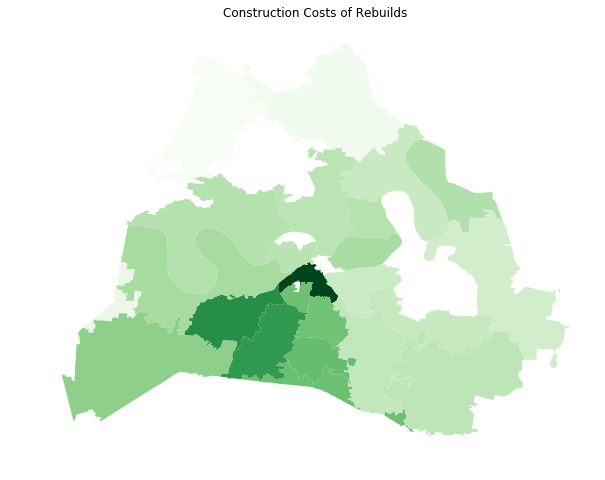

In [73]:
variable = 'ConstCost'

colors = 12
cmap = 'Greens'

ax=merged.plot(variable,cmap)

ax.axis('off')

ax.set_title('Construction Costs of Rebuilds')

from matplotlib.pyplot import figure
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

ax;

In [40]:
rebuilds['Lat']=pd.to_numeric(rebuilds['Lat'],errors='coerce')
rebuilds['Long']=pd.to_numeric(rebuilds['Long'],errors='coerce')

In [80]:
coord_map_homes = folium.Map(location=[36.1627, -86.7816],
                    zoom_start = 10)

#folium.map.Marker(
  #  [36.1627,-86.7816],
  #  icon=DivIcon(
   #    icon_size=(150,36),
  #     icon_anchor=(0,0),
   #    html='<div style="font-size: 24pt">Nashville, Yall</div>',
     #  )
  # ).add_to(coord_map_homes)

#folium.CircleMarker(
  #  location=[45, -10],
  #  radius=25,
  #  fill=True,
  #  popup=folium.Popup('inline explicit Popup')
#).add_to(coord_map_homes)

#for i in range(1,len(rebuilds)):
     #  if np.isnan(row['Lat']) or np.isnan(row['Long']):
      #  continue     
      #  folium.CircleMarker([rebuilds.iloc[i]['Lat'], rebuilds.iloc[i]['Long']]).add_to(coord_map_homes)

        #folium.CircleMarker([rebuilds.iloc[i]['Lat'], rebuilds.iloc[i]['Long']]).add_to(coord_map_homes),radius=rebuilds.iloc[i]['ConstCost'], color='green',opacity=0.5,popup='Address: ' + str(rebuilds.iloc[i]['Address']) + '<br/>'+ str(rebuilds.iloc[i]['PermTypeDesc']) + '<br/>' + str(rebuilds.iloc[i]['ConstCost']).add_to(coord_map_homes)



color="#E37222"

mc = MarkerCluster()

for ind, row in rebuilds.iterrows():
    if np.isnan(row['Lat']) or np.isnan(row['Long']):
        continue
        
    row_values = row[1]
    location = [row['Lat'], row['Long']]
    mc.add_child(folium.CircleMarker(location=location,
                                 color=color,
                                 ))
    coord_map_homes.add_child(mc)


coord_map_homes

In [42]:
# morgage formula
# P = L[c(1 + c)n]/[(1 + c)n - 1], P=monthly payment,c=interest rate,n =number of months
# calculate yearly spending
Family_2013['Monthly_Housing_Spending']=(Family_2013.AppraisedValue-Family_2013.AppraisedValue*0.05)*(0.003958*(1+0.003958)**360)/((1+0.003958)**360-1)
Family_2009['Monthly_Housing_Spending']=(Family_2009.AppraisedValue-Family_2009.AppraisedValue*0.05)*(0.003958*(1+0.003958)**360)/((1+0.003958)**360-1)
Family_2017['Monthly_Housing_Spending']=(Family_2017.AppraisedValue-Family_2017.AppraisedValue*0.05)*(0.003958*(1+0.003958)**360)/((1+0.003958)**360-1)

#nulls09 = Family_2009_Zip.loc[Family_2009_Zip['Lat'] == 'nan'].index
#nulls13 = Family_2013_zip.loc[Family_2013_zip['Lat'] == 'nan'].index
#nulls17 = Family_2017_zip.loc[Family_2017_zip['Lat'] == 'nan'].index

#Family_2009_Zip = Family_2009_Zip.drop(index=nulls09)
#Family_2013_zip = Family_2013_zip.drop(index=nulls13)
#Family_2017_zip = Family_2017_zip.drop(index=nulls17)

In [43]:
Family_2009.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,Monthly_Housing_Spending
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,572.351085
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,658.079863
2,00200001001,GSD,10,1992 SPRINGFIELD HWY,GOODLETTSVILLE,37072,0.0,0.0,0.0,0.0,0.000000
3,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,757.683818
4,00200001200,GSD,10,1855 LAKE RD,RIDGETOP,37152,0.0,0.0,0.0,0.0,0.000000


In [44]:
AMI_2017=68000

AMI_2009=64900
AMI_2013=62300

income_cat_1_2017=0.30* AMI_2017
income_cat_2_2017=0.60*AMI_2017
income_cat_3_2017=0.80*AMI_2017
income_cat_4_2017=1.20*AMI_2017

income_cat_1_2013=0.30* AMI_2013
income_cat_2_2013=0.60*AMI_2013
income_cat_3_2013=0.80*AMI_2013
income_cat_4_2013=1.20*AMI_2013

income_cat_1_2009=0.30* AMI_2009
income_cat_2_2009=0.60*AMI_2009
income_cat_3_2009=0.80*AMI_2009
income_cat_4_2009=1.20*AMI_2009

cat1_spend_2017=(income_cat_1_2017*0.3)/12
cat2_spend_2017=(income_cat_2_2017*0.3)/12
cat3_spend_2017=(income_cat_3_2017*0.3)/12
cat4_spend_2017=(income_cat_4_2017*0.3)/12

cat1_spend_2013=(income_cat_1_2013*0.3)/12
cat2_spend_2013=(income_cat_2_2013*0.3)/12
cat3_spend_2013=(income_cat_3_2013*0.3)/12
cat4_spend_2013=(income_cat_4_2013*0.3)/12

cat1_spend_2009=(income_cat_1_2009*0.3)/12
cat2_spend_2009=(income_cat_2_2009*0.3)/12
cat3_spend_2009=(income_cat_3_2009*0.3)/12
cat4_spend_2009=(income_cat_4_2009*0.3)/12

def bucket_2009(x):
    if x<=cat2_spend_2009:
        return 'Affordable_housing'
    elif x<=cat4_spend_2009:
        return 'Workforce_housing'
    else:
        return 'Market_rate'

def bucket_2013(x):
    if x<=cat2_spend_2013:
        return 'Affordable_housing'
    elif x<=cat4_spend_2013:
        return 'Workforce_housing'
    else:
        return 'Market_rate'

def bucket_2017(x):
    if x<=cat2_spend_2017:
        return 'Affordable_housing'
    elif x<=cat4_spend_2017:
        return 'Workforce_housing'
    else:
        return 'Market_rate'

Family_2013['Buckets']=Family_2013.Monthly_Housing_Spending.apply(bucket_2013)

Family_2009['Buckets']=Family_2009.Monthly_Housing_Spending.apply(bucket_2009)

Family_2017['Buckets']=Family_2017.Monthly_Housing_Spending.apply(bucket_2017)

In [45]:
# create backet 2
Family_2009_bucket_2=Family_2009.loc[Family_2009['Buckets']=='Affordable_housing']# create backet 3
# create backet 4
Family_2009_bucket_4=Family_2009.loc[Family_2009['Buckets']=='Workforce_housing']# create backet 5
Family_2009_bucket_5=Family_2009.loc[Family_2009['Buckets']=='Market_rate']

In [46]:

Family_2013_bucket_2=Family_2013.loc[Family_2013['Buckets']=='Affordable_housing']# create backet 3

Family_2013_bucket_4=Family_2013.loc[Family_2013['Buckets']=='Workforce_housing']# create backet 5
Family_2013_bucket_5=Family_2013.loc[Family_2013['Buckets']=='Market_rate']

In [47]:

# create backet 2
Family_2017_bucket_2=Family_2017.loc[Family_2017['Buckets']=='Affordable_housing']# create backet 3

# create backet 4
Family_2017_bucket_4=Family_2017.loc[Family_2017['Buckets']=='Workforce_housing']# create backet 5
Family_2017_bucket_5=Family_2017.loc[Family_2017['Buckets']=='Market_rate']

In [81]:
Family_2009_Zip=pd.merge(Zip_Codes,Family_2009,on='Zip')
Family_2009_Zip.head()

,Zip,Lat,Long,APN,DistrictCode,DistrictNo,Address,City,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,Monthly_Housing_Spending,Buckets
0,37013,36.052231,-86.632515,135140A00100CO,USD,28,700 PICCADILLY ROW,ANTIOCH,31500.0,77600.0,109100.0,27275.0,540.636393,Affordable_housing
1,37013,36.052231,-86.632515,135140A00200CO,USD,28,704 PICCADILLY ROW,ANTIOCH,31500.0,96400.0,127900.0,31975.0,633.798301,Affordable_housing
2,37013,36.052231,-86.632515,135140A00300CO,USD,28,708 PICCADILLY ROW,ANTIOCH,31500.0,116400.0,147900.0,36975.0,732.906714,Affordable_housing
3,37013,36.052231,-86.632515,135140A00400CO,USD,28,712 PICCADILLY ROW,ANTIOCH,31500.0,98000.0,129500.0,32375.0,641.726974,Affordable_housing
4,37013,36.052231,-86.632515,135140A00500CO,USD,28,716 PICCADILLY ROW,ANTIOCH,31500.0,95700.0,127200.0,31800.0,630.329507,Affordable_housing


In [82]:
Family_2013_zip=pd.merge(Zip_Codes,Family_2013,on='Zip')
Family_2013_zip.head()

,Zip,Lat,Long,APN,DistrictCode,DistrictNo,Address,City,LandValue,ImprovementValue,AppraisedValue,2013 TOTAL ASSD,Monthly_Housing_Spending,Buckets
0,37013,36.052231,-86.632515,135140A00100CO,USD,28,700 PICCADILLY ROW,ANTIOCH,27000.0,80400.0,107400.0,26850.0,532.212178,Affordable_housing
1,37013,36.052231,-86.632515,135140A00200CO,USD,28,704 PICCADILLY ROW,ANTIOCH,27000.0,92000.0,119000.0,29750.0,589.695058,Affordable_housing
2,37013,36.052231,-86.632515,135140A00300CO,USD,28,708 PICCADILLY ROW,ANTIOCH,27000.0,109700.0,136700.0,34175.0,677.406003,Affordable_housing
3,37013,36.052231,-86.632515,135140A00400CO,USD,28,712 PICCADILLY ROW,ANTIOCH,27000.0,93100.0,120100.0,30025.0,595.146020,Affordable_housing
4,37013,36.052231,-86.632515,135140A00500CO,USD,28,716 PICCADILLY ROW,ANTIOCH,27000.0,91200.0,118200.0,29550.0,585.730721,Affordable_housing


In [50]:
Family_2017_zip=pd.merge(Zip_Codes,Family_2017,on='Zip')

In [51]:
Zip_Codes.head()

,Zip,Lat,Long
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [52]:
Family_2009['Zip'].unique()

array([37072, 37152, 37080, 37189, 37115, 37207, 37138, 37015, 37218,
       37216, 37214, 37076, 37209, 37208, 37206, 37143, 37228, 37219,
       37201, 37122, 37203, 37212, 37210, 37205, 37211, 37215, 37204,
       37217, 37221, 37220, 37013, 37027, 37086, 37064, 37135])

In [53]:
Family_2013['Zip'].unique()

array([37080, 37072, 37189, 37115, 37207, 37138, 37015, 37218, 37216,
       37214, 37076, 37209, 37208, 37206, 37143, 37228, 37219, 37201,
       37122, 37203, 37212, 37210, 37205, 37211, 37215, 37204, 37217,
       37221, 37220, 37013, 37027, 37086, 37064, 37135])

In [54]:
Family_2017['Zip'].unique()

array([37072, 37080, 37189, 37115, 37207, 37138, 37015, 37218, 37216,
       37214, 37076, 37209, 37208, 37206, 37215, 37143, 37219, 37201,
       37122, 37203, 37212, 37210, 37205, 37211,     0, 37204, 37217,
       37221, 37220, 37013, 37027, 37086, 37064, 37135])

In [55]:
 Coord_df.loc[Coord_df['Lat']=='GARAGE']

,Lat,Long,PermType,PermTypeDesc,PermitNo,PermSubtypeDesc,Parcel,Issued,ConstCost,Address,...,Zip,SubdLot,Contact,PermSubtype,IVRTrk#,Purpose,CouncilDist,CensusTract,MappedLoc,Location
1935,GARAGE,None,CARN,Building Residential - New,2016028878,"Accessory Structure, Garage",105054C00100CO,06/15/2016,19102.0,1004B WADE AVE (GARAGE),...,37203,UNIT 1004 1004 & 1006 WADE HOMES,GRAHAM CONSTRUCTION OF TENNESSEE LLC,CAA14U009,3250616,To construct 20.7'x20.7' detached garage to re...,17.0,37016200.0,"1004B WADE AVE (GARAGE)\nNASHVILLE, TN 37203\n...",(GARAGE)
13485,GARAGE,None,CARN,Building Residential - New,2016028885,"Accessory Structure, Garage",105054C00200CO,06/15/2016,19102.0,1006B WADE AVE (GARAGE),...,37203,UNIT 1006 1004 & 1006 WADE HOMES,GRAHAM CONSTRUCTION OF TENNESSEE LLC,CAA14U009,3250631,To construct 20.7'x20.7' detached garage to re...,17.0,37016200.0,"1006B WADE AVE (GARAGE)\nNASHVILLE, TN 37203\n...",(GARAGE)
30237,GARAGE,None,CARN,Building Residential - New,201624065,"Accessory Structure, Garage",10405030900,05/23/2016,15000.0,108B BOWLING AVE (GARAGE),...,37205,LOT 303 RICHLAND RLTY CO DIV B,"WHITE, TORNE & SANDRA",CAA14U009,3244239,RESTRICTIVE COVENANT FOR DETACHED STRUCTURE 20...,24.0,37016700.0,"108B BOWLING AVE (GARAGE)\nNASHVILLE, TN 37205...",(GARAGE)


In [56]:
 Coord_df=Coord_df.loc[Coord_df['Lat']!='GARAGE']

In [57]:
Coord_df=Coord_df.loc[Coord_df['Lat']!='GARAGE APT IN REAR']
Coord_df=Coord_df.loc[Coord_df['Lat']!='DETACHED GARAGE']
Coord_df=Coord_df.loc[Coord_df['Lat']!='DETACHED DWELLING']
Coord_df=Coord_df.loc[Coord_df['Lat']!='HOUSE IN REAR']


In [58]:
#result=re.findall('-?\d*\.\d*',Building_Permits.MappedLoc[2])

In [59]:
Coord_df['Lat']=pd.to_numeric(Coord_df['Lat'],errors='coerce')
Coord_df['Long']=pd.to_numeric(Coord_df['Long'],errors='coerce')

In [60]:
Coord_df_map=Coord_df.iloc[0:3000,:]

In [61]:
#coord_map = folium.Map(location=[36.1627, -86.7816],
           #         zoom_start = 10)

#color="#E37222"

#mc = MarkerCluster()

#for ind, row in Coord_df_map.iterrows():
 #   if np.isnan(row['Lat']) or np.isnan(row['Long']):
  #      continue
        
 #   row_values = row[1]
 #   location = [row['Lat'], row['Long']]
  #  mc.add_child(folium.CircleMarker(location=location,
                         #        color=color,
                      #           ))
  #  coord_map.add_child(mc)



#coord_map

In [62]:
Family_2009['Zip'].unique()

array([37072, 37152, 37080, 37189, 37115, 37207, 37138, 37015, 37218,
       37216, 37214, 37076, 37209, 37208, 37206, 37143, 37228, 37219,
       37201, 37122, 37203, 37212, 37210, 37205, 37211, 37215, 37204,
       37217, 37221, 37220, 37013, 37027, 37086, 37064, 37135])

In [63]:
Family_2009['Zip'].describe()

count    183414.000000
mean      37166.304606
std          73.360963
min       37013.000000
25%       37115.000000
50%       37208.000000
75%       37214.000000
max       37228.000000
Name: Zip, dtype: float64

In [64]:
Family_2009_map=Family_2009_Zip.iloc[:]

In [65]:
#map_2009 = folium.Map(location=[36.1627, -86.7816],
                   # zoom_start = 10)

#color="#E37222"

#mc = MarkerCluster()

#for ind, row in Family_2009_map.iterrows():
   # if np.isnan(row['Lat']) or np.isnan(row['Long']):
   #     continue
        
   # row_values = row[1]
   # location = [row['Lat'], row['Long']]
    #mc.add_child(folium.CircleMarker(location=location,
                              # color=color,
                              # ))
#map_2009.add_child(mc)



#map_2009

In [66]:
Family_2009_bucket_2.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,Monthly_Housing_Spending
count,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000
mean,16.821746,37160.084727,29693.876448,91949.634403,121643.510851,30673.696799,602.794766
std,10.099028,76.149545,12508.163258,31880.324039,37352.956905,9345.110592,185.099614
min,1.000000,37013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,37115.000000,22500.000000,69900.000000,95400.000000,24125.000000,472.747130
50%,15.000000,37207.000000,27500.000000,92000.000000,121500.000000,30525.000000,602.083609
75%,27.000000,37214.000000,34000.000000,115100.000000,149400.000000,37500.000000,740.339845
max,35.000000,37228.000000,195000.000000,184000.000000,196400.000000,78520.000000,973.244616


In [67]:
Family_2013_bucket_2.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2013 TOTAL ASSD,Monthly_Housing_Spending
count,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000
mean,17.004755,37158.223231,26852.154607,89542.650473,116394.805080,29399.643035,576.785221
std,10.146529,77.279743,12297.136662,31163.619921,36955.428691,9329.895137,183.129695
min,1.000000,37013.000000,800.000000,0.000000,1400.000000,350.000000,6.937589
25%,8.000000,37080.000000,20000.000000,67600.000000,89900.000000,22675.000000,445.492317
50%,15.000000,37207.000000,25000.000000,90000.000000,116700.000000,29375.000000,578.297590
75%,27.000000,37214.000000,31000.000000,112700.000000,144600.000000,36350.000000,716.553826
max,99.000000,37228.000000,184800.000000,182100.000000,188500.000000,75200.000000,934.096793


In [68]:
Family_2017_bucket_4.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2017 TOTAL ASSD,Monthly_Housing_Spending
count,71019.000000,71019.000000,71019.000000,71019.000000,71019.000000,71019.000000,71019.000000
mean,17.968459,37173.944142,78525.834664,203397.304665,281923.139329,70778.319971,1397.047747
std,10.486622,69.338828,47778.083004,57598.446034,56788.469745,14642.343765,281.410756
min,1.000000,37013.000000,10900.000000,0.000000,205900.000000,51475.000000,1020.321112
25%,7.000000,37138.000000,48000.000000,171100.000000,233400.000000,58400.000000,1156.595180
50%,19.000000,37209.000000,61000.000000,198900.000000,268800.000000,67375.000000,1332.017071
75%,26.000000,37215.000000,88000.000000,239900.000000,322900.000000,81200.000000,1600.105329
max,35.000000,37221.000000,400100.000000,378200.000000,411600.000000,162520.000000,2039.651140


In [69]:
Family_2009_bucket_2.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,Monthly_Housing_Spending
count,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000,127728.000000
mean,16.821746,37160.084727,29693.876448,91949.634403,121643.510851,30673.696799,602.794766
std,10.099028,76.149545,12508.163258,31880.324039,37352.956905,9345.110592,185.099614
min,1.000000,37013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,37115.000000,22500.000000,69900.000000,95400.000000,24125.000000,472.747130
50%,15.000000,37207.000000,27500.000000,92000.000000,121500.000000,30525.000000,602.083609
75%,27.000000,37214.000000,34000.000000,115100.000000,149400.000000,37500.000000,740.339845
max,35.000000,37228.000000,195000.000000,184000.000000,196400.000000,78520.000000,973.244616


In [70]:
Family_2013_bucket_2.describe()

,DistrictNo,Zip,LandValue,ImprovementValue,AppraisedValue,2013 TOTAL ASSD,Monthly_Housing_Spending
count,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000,126385.000000
mean,17.004755,37158.223231,26852.154607,89542.650473,116394.805080,29399.643035,576.785221
std,10.146529,77.279743,12297.136662,31163.619921,36955.428691,9329.895137,183.129695
min,1.000000,37013.000000,800.000000,0.000000,1400.000000,350.000000,6.937589
25%,8.000000,37080.000000,20000.000000,67600.000000,89900.000000,22675.000000,445.492317
50%,15.000000,37207.000000,25000.000000,90000.000000,116700.000000,29375.000000,578.297590
75%,27.000000,37214.000000,31000.000000,112700.000000,144600.000000,36350.000000,716.553826
max,99.000000,37228.000000,184800.000000,182100.000000,188500.000000,75200.000000,934.096793


In [71]:
Family_2017_bucket_2.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2017 TOTAL ASSD,Monthly_Housing_Spending,Buckets
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,46700,88700,135400,33850,670.963956,Affordable_housing
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,40100,109700,149800,37450,742.322014,Affordable_housing
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,18000,185100,203100,50775,1006.445934,Affordable_housing
4,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,30000,34100,64100,16025,317.642464,Affordable_housing
5,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,18300,79500,97800,24450,484.640140,Affordable_housing
